In [1]:
# Было использовано глобальное окружение для этого файла
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("final.csv")
df = df.replace(0, np.nan)
df.isna().sum()

Месяц                                0
Коррупция                            1
Взятка                               1
Подкуп                              74
Злоупотребление полномочиями        88
                                    ..
Антикора                            44
Антикору                            88
Антикором                           88
Антикоре                            88
Всего коррупционных преступлений     0
Length: 79, dtype: int64

In [3]:
# Определяем пороговое значение для удаления столбцов
threshold = len(df) * 0.7

# Удаляем столбцы, где количество NaN больше порогового значения
df = df.dropna(axis=1, thresh=threshold)

In [4]:
df_null = df[df.isna().sum()[df.isna().sum() > 0].index]
df_not_null = df[df_null.columns].notnull().sum()
print("Количество нулевых значений")
df.isna().sum()[df.isna().sum() > 0]

Количество нулевых значений


Коррупция          1
Взятка             1
приговор           7
Хищение            9
расследование      3
Задержание        11
Преступление       2
миллиард          12
миллион            1
судебный          12
процесс           18
аким               9
начальник         18
заместитель        3
район             12
город              7
область            1
правонарушение     9
dtype: int64

In [5]:
print("Количество не нулевых значений")
print(df_not_null)

Количество не нулевых значений
Коррупция         87
Взятка            87
приговор          81
Хищение           79
расследование     85
Задержание        77
Преступление      86
миллиард          76
миллион           87
судебный          76
процесс           70
аким              79
начальник         70
заместитель       85
район             76
город             81
область           87
правонарушение    79
dtype: int64


In [6]:
print("Процент нулевых значений от общего количество записей")
[(x/(x + y)) * 100 for x, y in zip(df_null.isnull().sum(), df_not_null)]

Процент нулевых значений от общего количество записей


[1.1363636363636365,
 1.1363636363636365,
 7.954545454545454,
 10.227272727272728,
 3.4090909090909087,
 12.5,
 2.272727272727273,
 13.636363636363635,
 1.1363636363636365,
 13.636363636363635,
 20.454545454545457,
 10.227272727272728,
 20.454545454545457,
 3.4090909090909087,
 13.636363636363635,
 7.954545454545454,
 1.1363636363636365,
 10.227272727272728]

Heatmap of NaN values


<Axes: >

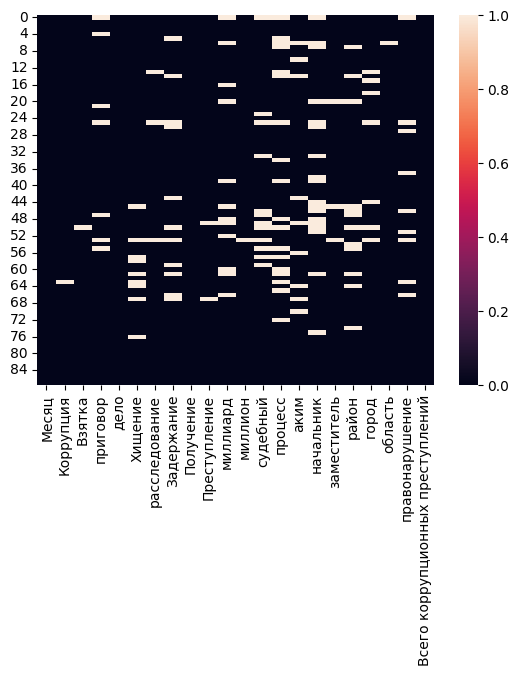

In [7]:
print("Heatmap of NaN values")
sns.heatmap(df.isnull())

In [8]:
# Заменяем все NaN значением моды для каждого столбца
for column in df.columns:
    mode_value = df[column].mode()[0]  # Получаем первое значение моды
    df[column] = df[column].fillna(mode_value)

In [9]:
df.isnull().sum()

Месяц                               0
Коррупция                           0
Взятка                              0
приговор                            0
дело                                0
Хищение                             0
расследование                       0
Задержание                          0
Получение                           0
Преступление                        0
миллиард                            0
миллион                             0
судебный                            0
процесс                             0
аким                                0
начальник                           0
заместитель                         0
район                               0
город                               0
область                             0
правонарушение                      0
Всего коррупционных преступлений    0
dtype: int64

In [12]:
df = df.rename(columns={"Месяц": "Дата"})
df["Дата"] = pd.to_datetime(df["Дата"])

In [13]:
df.to_csv("cleaned_final.csv", index=False, encoding="utf-8")